In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [103]:
df = pd.read_csv("911.csv",parse_dates = ["timeStamp"])
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [104]:
df.shape

(663522, 9)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   lat        663522 non-null  float64       
 1   lng        663522 non-null  float64       
 2   desc       663522 non-null  object        
 3   zip        583323 non-null  float64       
 4   title      663522 non-null  object        
 5   timeStamp  663522 non-null  datetime64[ns]
 6   twp        663229 non-null  object        
 7   addr       663522 non-null  object        
 8   e          663522 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 45.6+ MB


In [106]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

In [107]:
df = df.dropna()

<AxesSubplot:title={'center':'Heatmap visualizing null values'}>

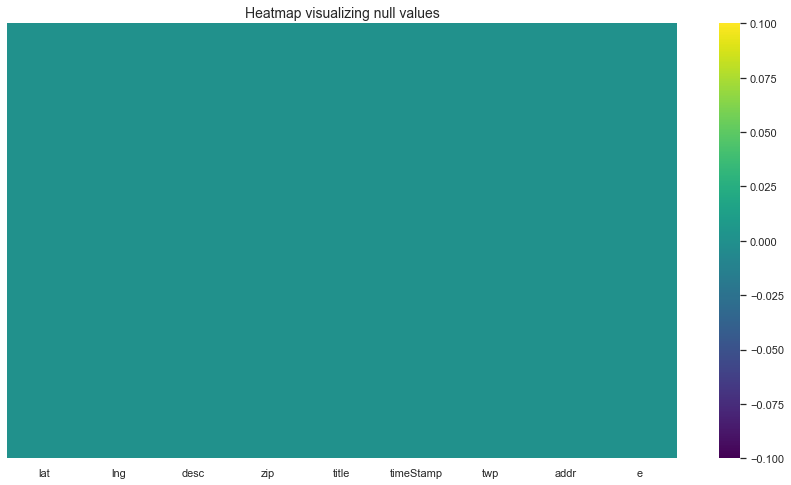

In [108]:
plt.subplots(figsize= (15, 8))
plt.title( "Heatmap visualizing null values" , size = 14 )
sns.heatmap(df.isnull(),yticklabels=False, cmap='viridis')

In [109]:
df.shape

(583199, 9)

In [7]:
# Do not touch
type(df.timeStamp[0])

pandas._libs.tslibs.timestamps.Timestamp

In [110]:
df['zip'].value_counts().head(5)

19401.0    45596
19464.0    43902
19403.0    34888
19446.0    32268
19406.0    22456
Name: zip, dtype: int64

In [11]:
df['twp'].value_counts().head(5)

LOWER MERION    47487
ABINGTON        38137
NORRISTOWN      35881
POTTSTOWN       26837
CHELTENHAM      26647
Name: twp, dtype: int64

In [111]:
df['title'].value_counts().head(30)

Traffic: VEHICLE ACCIDENT -             125113
Traffic: DISABLED VEHICLE -              36935
Fire: FIRE ALARM                         36245
EMS: FALL VICTIM                         32755
EMS: RESPIRATORY EMERGENCY               32495
EMS: CARDIAC EMERGENCY                   30482
EMS: SUBJECT IN PAIN                     18597
Traffic: ROAD OBSTRUCTION -              18507
EMS: HEAD INJURY                         17419
EMS: VEHICLE ACCIDENT                    15752
EMS: GENERAL WEAKNESS                    11242
EMS: SEIZURES                            10134
EMS: SYNCOPAL EPISODE                    10119
EMS: MEDICAL ALERT ALARM                  9968
EMS: UNKNOWN MEDICAL EMERGENCY            9568
EMS: ALTERED MENTAL STATUS                9547
Fire: FIRE INVESTIGATION                  8945
EMS: ABDOMINAL PAINS                      8494
EMS: UNCONSCIOUS SUBJECT                  8200
EMS: CVA/STROKE                           7832
EMS: HEMORRHAGING                         7829
EMS: OVERDOSE

In [112]:
df['reason'] = df['title'].apply(lambda y: y.split(':')[0]) 
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,EMS


In [113]:
df['reason'].value_counts()

EMS        304785
Traffic    189597
Fire        88817
Name: reason, dtype: int64

In [114]:
df['title'].nunique()

144

<AxesSubplot:xlabel='reason', ylabel='count'>

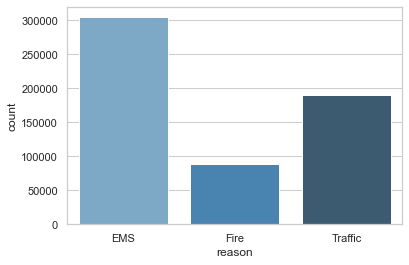

In [115]:
sns.countplot(x='reason',data=df, palette="Blues_d")

In [116]:
df['year'] = pd.DatetimeIndex(df['timeStamp']).year
df['month'] = pd.DatetimeIndex(df['timeStamp']).month
df['day name'] = df["timeStamp"].dt.day_name()
df['month name'] = df["timeStamp"].dt.month_name()
df['Date']=df['timeStamp'].apply(lambda t: t.date())
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,year,month,day name,month name,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,12,Thursday,December,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,12,Thursday,December,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015,12,Thursday,December,2015-12-10


<AxesSubplot:title={'center':'Reason for 911 calls year wise'}, xlabel='year', ylabel='count'>

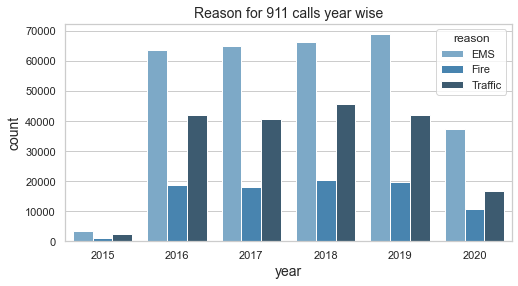

In [117]:
plt.figure(figsize = (8,4))
plt.title('Reason for 911 calls year wise' , size = 14 )
plt.ylabel( "Count" , size = 14 )
plt.xlabel( "Year" , size = 14 )
sns.countplot(x='year',data=df, hue='reason', palette="Blues_d")

<AxesSubplot:title={'center':'Reason for 911 calls month wise'}, xlabel='month name', ylabel='count'>

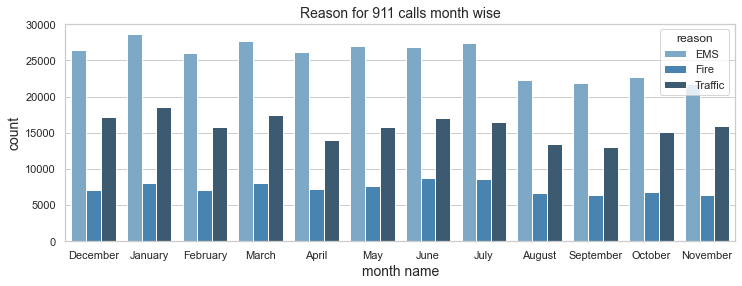

In [118]:
plt.figure(figsize = (12,4))
plt.title('Reason for 911 calls month wise' , size = 14 )
plt.ylabel( "month name" , size = 14 )
plt.xlabel( "Count" , size = 14 )
sns.countplot(x='month name',data=df, hue='reason', palette="Blues_d")

<AxesSubplot:title={'center':'Reason for 911 calls day wise'}, xlabel='day name', ylabel='count'>

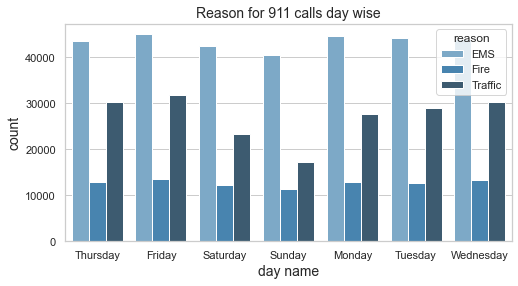

In [119]:
plt.figure(figsize = (8,4))
plt.title('Reason for 911 calls day wise' , size = 14 )
plt.ylabel( "Gold Medal" , size = 14 )
plt.xlabel( "Country" , size = 14 )
sns.countplot(x='day name',data=df, hue='reason', palette="Blues_d")

In [120]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,year,month,day name,month name,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,12,Thursday,December,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,12,Thursday,December,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015,12,Thursday,December,2015-12-10


In Above plots we can see that EMS i.e Emergency health services is count is very high in 3 plots that is by year, by month & by day. So now let's create a separate dataframe consisting of only Emergency health services. Let's try to find out what was title of most EMS cases.

In [121]:
ems = df[df['reason'] == 'EMS']
ems.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,year,month,day name,month name,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,12,Thursday,December,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,12,Thursday,December,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,12,Thursday,December,2015-12-10


In below results we can see that Fall Victim, Respiratory Emergency, Cardiac Emergency are top 3 reasons

In [28]:
emstop10 = ems['title'].value_counts().reset_index(name='count').head(10)
emstop10

,index,count
0,EMS: FALL VICTIM,32755
1,EMS: RESPIRATORY EMERGENCY,32495
2,EMS: CARDIAC EMERGENCY,30482
3,EMS: SUBJECT IN PAIN,18597
4,EMS: HEAD INJURY,17419
5,EMS: VEHICLE ACCIDENT,15752
6,EMS: GENERAL WEAKNESS,11242
7,EMS: SEIZURES,10134
8,EMS: SYNCOPAL EPISODE,10119
9,EMS: MEDICAL ALERT ALARM,9968


Text(0.5, 0, 'Count')

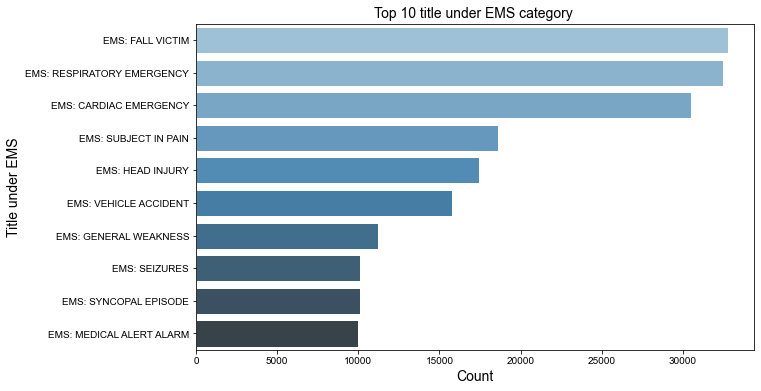

In [25]:
plt.subplots(figsize= (10, 6))
sns.set_theme(style="whitegrid")
tx = sns.barplot(x='count',y='index',data=emstop10,   palette="Blues_d")
plt.title('Top 10 title under EMS category ' , size = 14 )
plt.ylabel( "Title under EMS" , size = 14 )
plt.xlabel( "Count" , size = 14 )

Just like we did for EMS. Now let's do it for other 2 reamining reasons

In [29]:
traffic = df[df['reason'] == 'Traffic']
traffic.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,year,month,day name,month name,Date
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,2015,12,Thursday,December,2015-12-10
11,40.084161,-75.308386,BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ ...,19428.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 16:32:10,PLYMOUTH,BROOK RD & COLWELL LN,1,Traffic,2015,12,Thursday,December,2015-12-10
12,40.174131,-75.098491,BYBERRY AVE & S WARMINSTER RD; UPPER MORELAND;...,19040.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:15:49,UPPER MORELAND,BYBERRY AVE & S WARMINSTER RD,1,Traffic,2015,12,Thursday,December,2015-12-10


In [30]:
traffictop10 = traffic['title'].value_counts().reset_index(name='count').head(10)
traffictop10

,index,count
0,Traffic: VEHICLE ACCIDENT -,125113
1,Traffic: DISABLED VEHICLE -,36935
2,Traffic: ROAD OBSTRUCTION -,18507
3,Traffic: HAZARDOUS ROAD CONDITIONS -,6295
4,Traffic: VEHICLE FIRE -,2316
5,Traffic: VEHICLE LEAKING FUEL -,245
6,Traffic: DEBRIS/FLUIDS ON HIGHWAY -,186


Text(0.5, 0, 'Count')

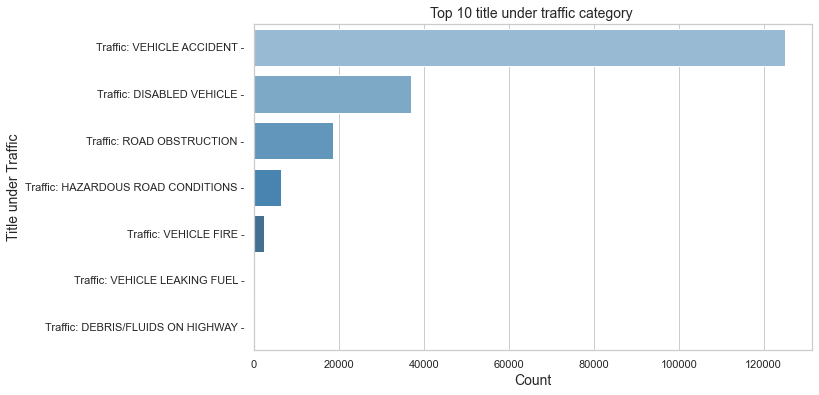

In [31]:
plt.subplots(figsize= (10, 6))
sns.set_theme(style="whitegrid")
tx = sns.barplot(x='count',y='index',data=traffictop10,   palette="Blues_d")
plt.title('Top 10 title under traffic category ' , size = 14 )
plt.ylabel( "Title under Traffic" , size = 14 )
plt.xlabel( "Count" , size = 14 )

In [33]:
fire = df[df['reason'] == 'Fire']
fire.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,year,month,day name,month name,Date
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015,12,Thursday,December,2015-12-10
22,40.199006,-75.300058,LILAC CT & PRIMROSE DR; UPPER GWYNEDD; 2015-12...,19446.0,Fire: APPLIANCE FIRE,2015-12-10 17:59:24,UPPER GWYNEDD,LILAC CT & PRIMROSE DR,1,Fire,2015,12,Thursday,December,2015-12-10
27,40.028903,-75.351822,EDENTON PL & DURHAM DR; DELAWARE COUNTY; 2015-...,19085.0,Fire: CARBON MONOXIDE DETECTOR,2015-12-10 18:05:19,DELAWARE COUNTY,EDENTON PL & DURHAM DR,1,Fire,2015,12,Thursday,December,2015-12-10


In [34]:
firetop10 = fire['title'].value_counts().reset_index(name='count').head(5)
firetop10

,index,count
0,Fire: FIRE ALARM,36245
1,Fire: FIRE INVESTIGATION,8945
2,Fire: VEHICLE ACCIDENT,6668
3,Fire: GAS-ODOR/LEAK,6112
4,Fire: ELECTRICAL FIRE OUTSIDE,4503


Text(0.5, 0, 'Count')

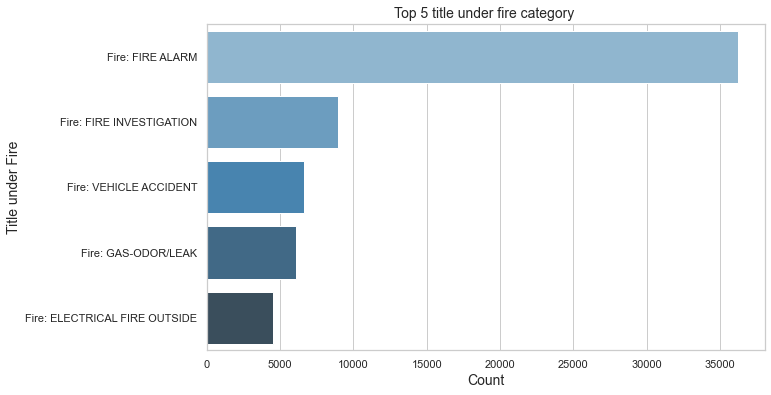

In [36]:
plt.subplots(figsize= (10, 6))
sns.set_theme(style="whitegrid")
tx = sns.barplot(x='count',y='index',data=firetop10,   palette="Blues_d")
plt.title('Top 5 title under fire category ' , size = 14 )
plt.ylabel( "Title under Fire" , size = 14 )
plt.xlabel( "Count" , size = 14 )

Text(0.5, 1.0, 'EMS month wise')

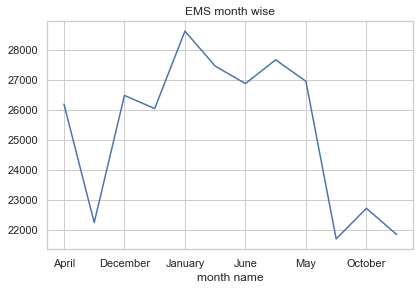

In [122]:
ems.groupby('month name').count()['twp'].plot()
plt.tight_layout()
plt.title('EMS month wise')

Text(0.5, 1.0, 'EMS day wise')

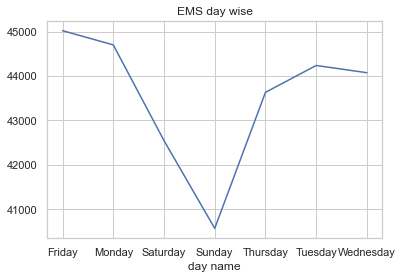

In [124]:
ems.groupby('day name').count()['twp'].plot()
plt.tight_layout
plt.title('EMS day wise')

Here in above line chart we can observe that ems cases are dropping on sundays.

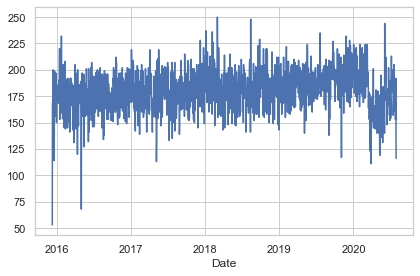

In [40]:
ems.groupby('Date').count()['twp'].plot()
plt.tight_layout()

Sicne in above line chart, visualization is clustered together & it is hard to understand. That's let give it another approach & solve this problem

In [41]:
ems['year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

Text(0.5, 1.0, 'EMS - 2015')

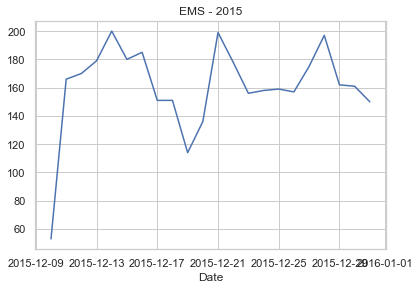

In [42]:
ems2015 = ems[ems['year'] == 2015]
ems2015.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('EMS - 2015')

Text(0.5, 1.0, 'EMS - 2016')

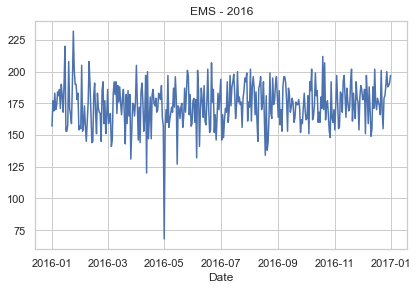

In [43]:
ems2016 = ems[ems['year'] == 2016]
ems2016.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('EMS - 2016')

Text(0.5, 1.0, 'EMS - 2017')

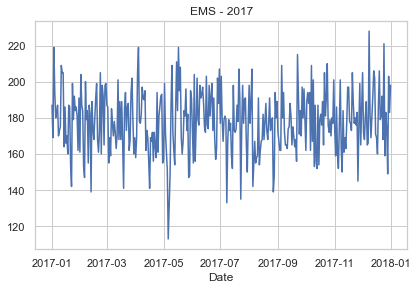

In [125]:
ems2017 = ems[ems['year'] == 2017]
ems2017.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('EMS - 2017')

Text(0.5, 1.0, 'EMS - 2018')

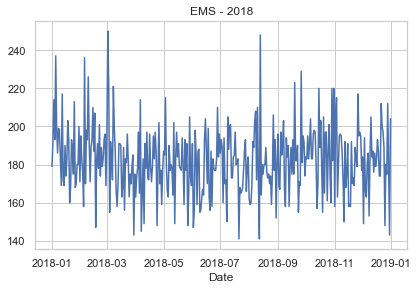

In [45]:
ems2018 = ems[ems['year'] == 2018]
ems2018.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('EMS - 2018')

Text(0.5, 1.0, 'EMS - 2019')

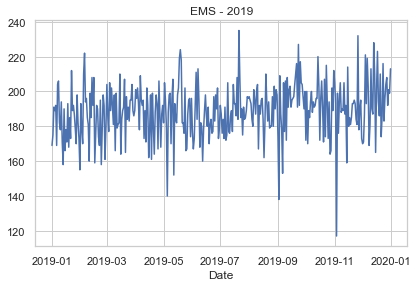

In [46]:
ems2019 = ems[ems['year'] == 2019]
ems2019.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('EMS - 2019')

Text(0.5, 1.0, 'EMS - 2020')

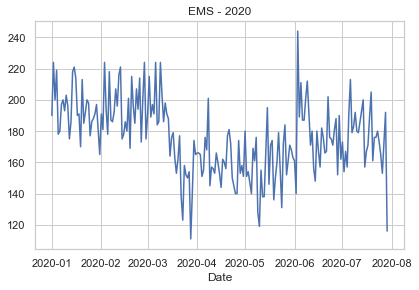

In [126]:
ems2020 = ems[ems['year'] == 2020]
ems2020.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('EMS - 2020')

In [48]:
fire.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,year,month,day name,month name,Date
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015,12,Thursday,December,2015-12-10
22,40.199006,-75.300058,LILAC CT & PRIMROSE DR; UPPER GWYNEDD; 2015-12...,19446.0,Fire: APPLIANCE FIRE,2015-12-10 17:59:24,UPPER GWYNEDD,LILAC CT & PRIMROSE DR,1,Fire,2015,12,Thursday,December,2015-12-10
27,40.028903,-75.351822,EDENTON PL & DURHAM DR; DELAWARE COUNTY; 2015-...,19085.0,Fire: CARBON MONOXIDE DETECTOR,2015-12-10 18:05:19,DELAWARE COUNTY,EDENTON PL & DURHAM DR,1,Fire,2015,12,Thursday,December,2015-12-10


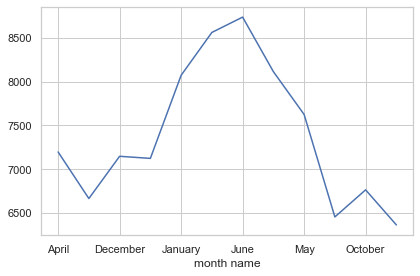

In [127]:
fire.groupby('month name').count()['twp'].plot()
plt.tight_layout()

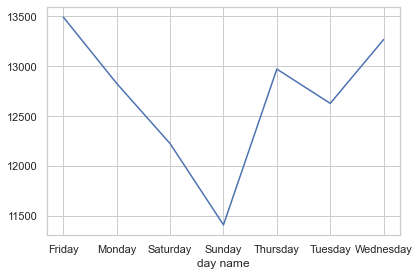

In [50]:
fire.groupby('day name').count()['twp'].plot()
plt.tight_layout()

Text(0.5, 1.0, 'Fire - 2015')

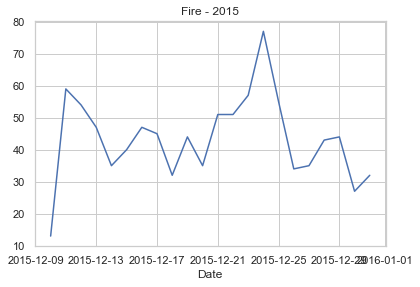

In [52]:
fire2015 = fire[fire['year'] == 2015]
fire2015.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Fire - 2015')

Text(0.5, 1.0, 'Fire - 2016')

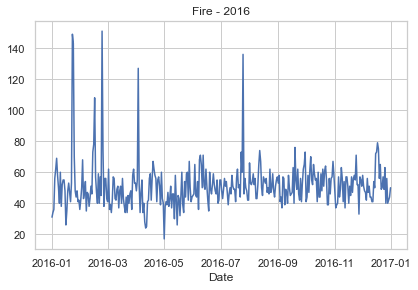

In [51]:
fire2016 = fire[fire['year'] == 2016]
fire2016.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Fire - 2016')

Text(0.5, 1.0, 'Fire - 2017')

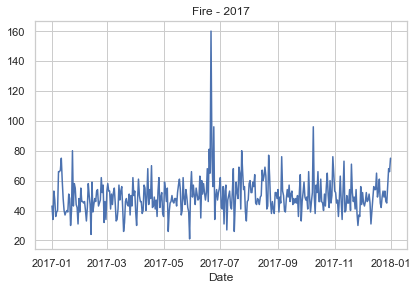

In [74]:
fire2017 = fire[fire['year'] == 2017]
fire2017.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Fire - 2017')

Text(0.5, 1.0, 'Fire - 2018')

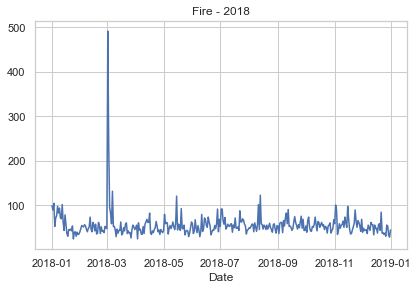

In [75]:
fire2018 = fire[fire['year'] == 2018]
fire2018.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Fire - 2018')

Text(0.5, 1.0, 'Fire - 2019')

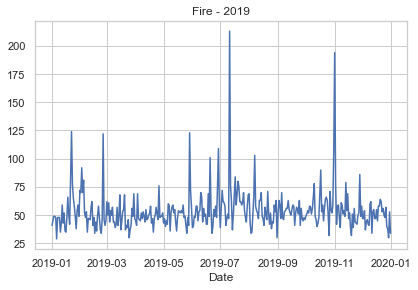

In [55]:
fire2019 = fire[fire['year'] == 2019]
fire2019.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Fire - 2019')

Text(0.5, 1.0, 'Fire - 2020')

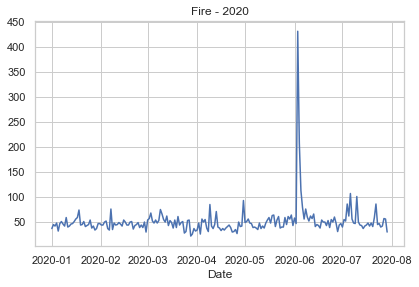

In [56]:
fire2020 = fire[fire['year'] == 2020]
fire2020.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Fire - 2020')

In [128]:
traffic.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,year,month,day name,month name,Date
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,2015,12,Thursday,December,2015-12-10
11,40.084161,-75.308386,BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ ...,19428.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 16:32:10,PLYMOUTH,BROOK RD & COLWELL LN,1,Traffic,2015,12,Thursday,December,2015-12-10


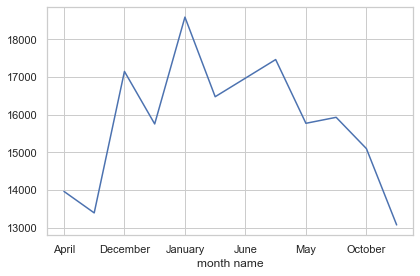

In [129]:
traffic.groupby('month name').count()['twp'].plot()
plt.tight_layout()

Text(0.5, 1.0, 'Traffic - 2015')

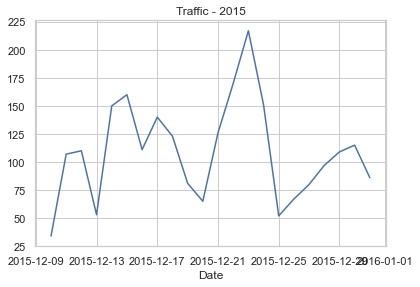

In [130]:
traffic2015 = traffic[traffic['year'] == 2015]
traffic2015.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Traffic - 2015')

Text(0.5, 1.0, 'Traffic - 2016')

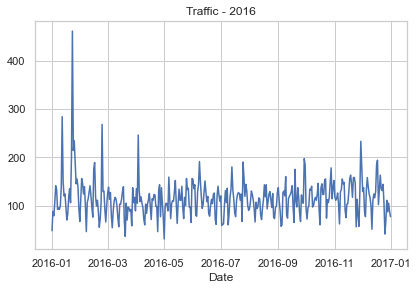

In [131]:
traffic2016 = traffic[traffic['year'] == 2016]
traffic2016.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Traffic - 2016')

Text(0.5, 1.0, 'Traffic - 2017')

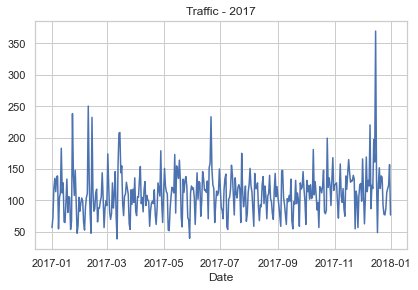

In [79]:
traffic2017 = traffic[traffic['year'] == 2017]
traffic2017.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Traffic - 2017')

Text(0.5, 1.0, 'Traffic - 2018')

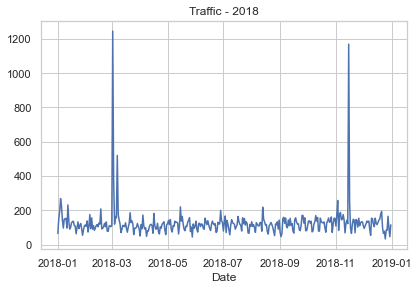

In [78]:
traffic2018 = traffic[traffic['year'] == 2018]
traffic2018.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Traffic - 2018')

Text(0.5, 1.0, 'Traffic - 2019')

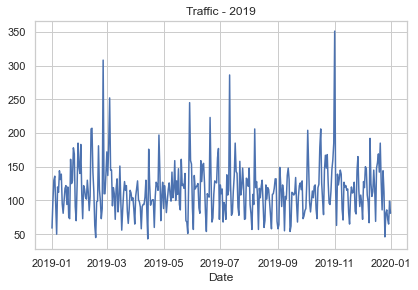

In [77]:
traffic2019 = traffic[traffic['year'] == 2019]
traffic2019.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Traffic - 2019')

Text(0.5, 1.0, 'Traffic - 2020')

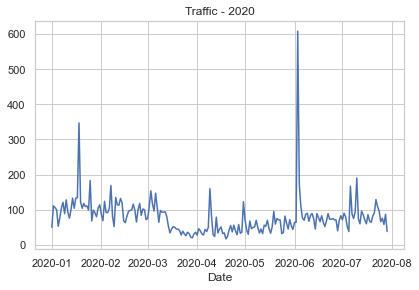

In [76]:
traffic2020 = traffic[traffic['year'] == 2020]
traffic2020.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Traffic - 2020')

Text(0.5, 0, 'Count')

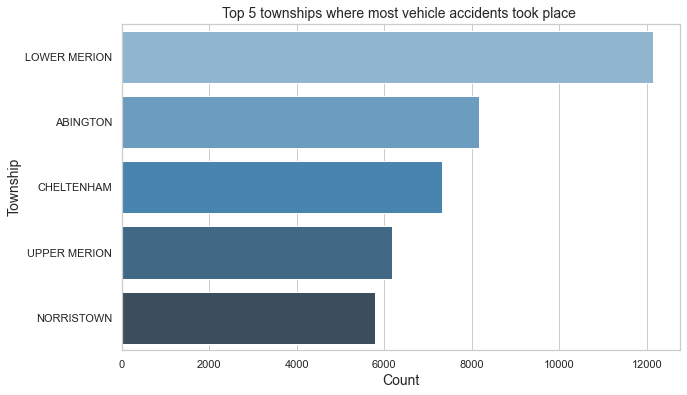

In [62]:
vehicle_accident = traffic[traffic['title'] == 'Traffic: VEHICLE ACCIDENT -']
veh_accident = vehicle_accident['twp'].value_counts().reset_index(name='count').head(5)
plt.subplots(figsize= (10, 6))
sns.set_theme(style="whitegrid")
tx = sns.barplot(x='count',y='index',data=veh_accident,   palette="Blues_d")
plt.title('Top 5 townships where most vehicle accidents took place ' , size = 14 )
plt.ylabel( "Township" , size = 14 )
plt.xlabel( "Count" , size = 14 )

In [86]:
vehicle_accident['hour'] = vehicle_accident['timeStamp'].dt.hour

C:\Users\Aryan\AppData\Local\Temp\ipykernel_9516\786732455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_accident['hour'] = vehicle_accident['timeStamp'].dt.hour


In [64]:
vehicle_accident.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,year,month,day name,month name,Date,hour
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,2015,12,Thursday,December,2015-12-10,17
11,40.084161,-75.308386,BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ ...,19428.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 16:32:10,PLYMOUTH,BROOK RD & COLWELL LN,1,Traffic,2015,12,Thursday,December,2015-12-10,16
12,40.174131,-75.098491,BYBERRY AVE & S WARMINSTER RD; UPPER MORELAND;...,19040.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:15:49,UPPER MORELAND,BYBERRY AVE & S WARMINSTER RD,1,Traffic,2015,12,Thursday,December,2015-12-10,17
13,40.062974,-75.135914,OLD YORK RD & VALLEY RD; CHELTENHAM; 2015-12-1...,19027.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:12:47,CHELTENHAM,OLD YORK RD & VALLEY RD,1,Traffic,2015,12,Thursday,December,2015-12-10,17
15,40.223778,-75.235399,STUMP RD & WITCHWOOD DR; MONTGOMERY; 2015-12-1...,18936.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:31:00,MONTGOMERY,STUMP RD & WITCHWOOD DR,1,Traffic,2015,12,Thursday,December,2015-12-10,17


Text(0.5, 1.0, 'Vehicle accident - 2015 by hours')

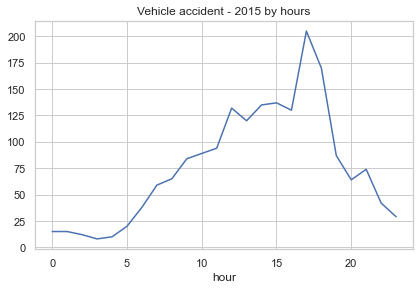

In [66]:
accident2015 = vehicle_accident[vehicle_accident['year'] == 2015]
accident2015.groupby('hour').count()['twp'].plot()
plt.tight_layout()
plt.title('Vehicle accident - 2015 by hours')

Text(0.5, 1.0, 'Vehicle accident - 2016 by hours')

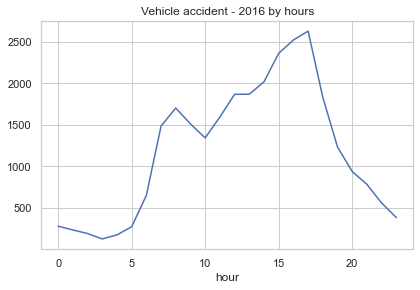

In [67]:
accident2016 = vehicle_accident[vehicle_accident['year'] == 2016]
accident2016.groupby('hour').count()['twp'].plot()
plt.tight_layout()
plt.title('Vehicle accident - 2016 by hours')

Text(0.5, 1.0, 'Vehicle accident - 2017 by hours')

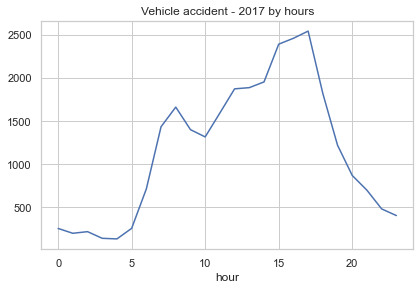

In [68]:
accident2017 = vehicle_accident[vehicle_accident['year'] == 2017]
accident2017.groupby('hour').count()['twp'].plot()
plt.tight_layout()
plt.title('Vehicle accident - 2017 by hours')

Text(0.5, 1.0, 'Vehicle accident - 2018 by hours')

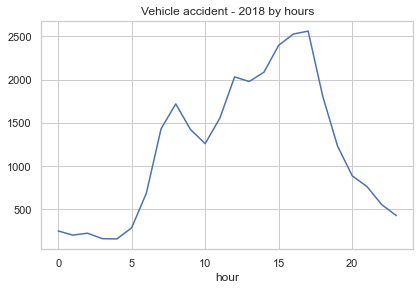

In [69]:
accident2018 = vehicle_accident[vehicle_accident['year'] == 2018]
accident2018.groupby('hour').count()['twp'].plot()
plt.tight_layout()
plt.title('Vehicle accident - 2018 by hours')

Text(0.5, 1.0, 'Vehicle accident - 2019 by hours')

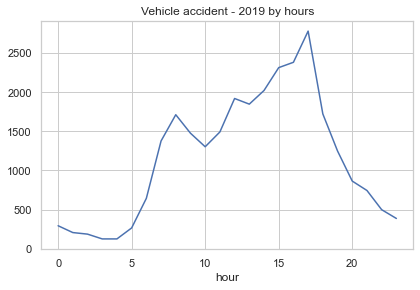

In [70]:
accident2019 = vehicle_accident[vehicle_accident['year'] == 2019]
accident2019.groupby('hour').count()['twp'].plot()
plt.tight_layout()
plt.title('Vehicle accident - 2019 by hours')

Text(0.5, 1.0, 'Vehicle accident - 2020 by hours')

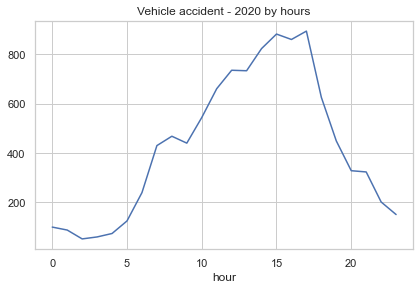

In [71]:
accident2020 = vehicle_accident[vehicle_accident['year'] == 2020]
accident2020.groupby('hour').count()['twp'].plot()
plt.tight_layout()
plt.title('Vehicle accident - 2020 by hours')

In title Vehicle accident - in all 6 years from 2015 to 2020. Sharp in Accident occurred after 15:00 hours that is 3PM 

Now let's Fire: GAS-ODOR/LEAK

In [90]:
gas = fire[fire['title'] == 'Fire: GAS-ODOR/LEAK']
gas['hour'] = gas['timeStamp'].dt.hour
gas.head(3)

C:\Users\Aryan\AppData\Local\Temp\ipykernel_9516\2250726608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gas['hour'] = gas['timeStamp'].dt.hour


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,year,month,day name,month name,Date,hour
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015,12,Thursday,December,2015-12-10,14
39,40.104206,-75.367665,HAMPTON RD & BELMONT RD; UPPER MERION; 2015-12...,19406.0,Fire: GAS-ODOR/LEAK,2015-12-10 18:32:25,UPPER MERION,HAMPTON RD & BELMONT RD,1,Fire,2015,12,Thursday,December,2015-12-10,18
104,40.138899,-75.151457,BURN BRAE DR & DUNDEE DR; UPPER DUBLIN; 2015-1...,19025.0,Fire: GAS-ODOR/LEAK,2015-12-10 22:52:55,UPPER DUBLIN,BURN BRAE DR & DUNDEE DR,1,Fire,2015,12,Thursday,December,2015-12-10,22


Text(0.5, 0, 'Count')

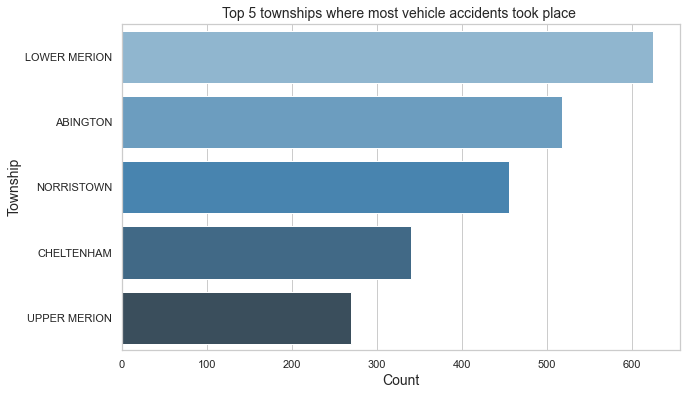

In [100]:
gastop10 = gas['twp'].value_counts().reset_index(name='count').head(5)
plt.subplots(figsize= (10, 6))
sns.set_theme(style="whitegrid")
tx = sns.barplot(x='count',y='index',data=gastop10,   palette="Blues_d")
plt.title('Top 5 townships where most vehicle accidents took place ' , size = 14 )
plt.ylabel( "Township" , size = 14 )
plt.xlabel( "Count" , size = 14 )

Text(0.5, 1.0, 'Gas Leak month wise')

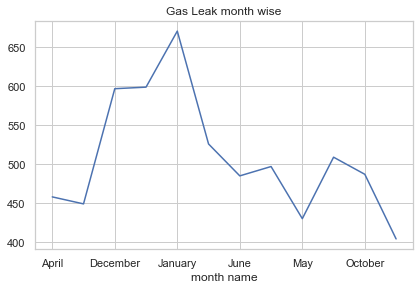

In [91]:
gas.groupby('month name').count()['twp'].plot()
plt.tight_layout()
plt.title('Gas Leak month wise')

Text(0.5, 1.0, 'Gas Leak hour wise')

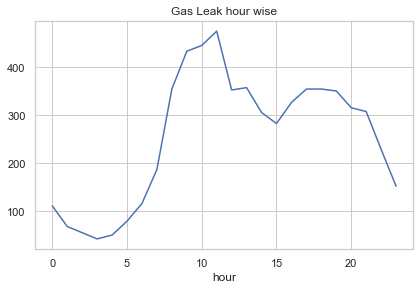

In [132]:
gas.groupby('hour').count()['twp'].plot()
plt.tight_layout()
plt.title('Gas Leak hour wise')

Text(0.5, 1.0, 'Gas Leak - 2015')

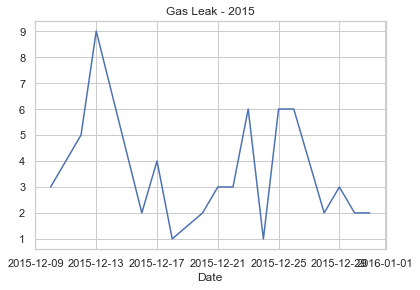

In [92]:
gas2015 = gas[gas['year'] == 2015]
gas2015.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Gas Leak - 2015')

Text(0.5, 1.0, 'Gas Leak - 2016')

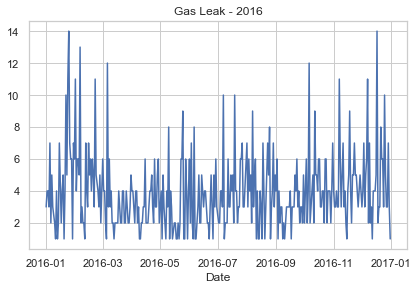

In [93]:
gas2016 = gas[gas['year'] == 2016]
gas2016.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Gas Leak - 2016')

Text(0.5, 1.0, 'Gas Leak - 2017')

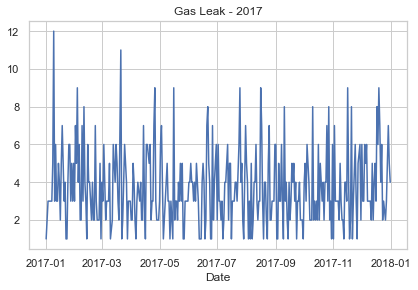

In [94]:
gas2017 = gas[gas['year'] == 2017]
gas2017.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Gas Leak - 2017')

Text(0.5, 1.0, 'Gas Leak - 2019')

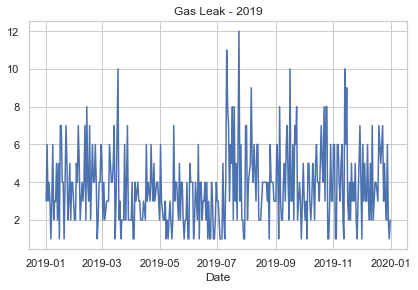

In [95]:
gas2019 = gas[gas['year'] == 2019]
gas2019.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Gas Leak - 2019')

Text(0.5, 1.0, 'Gas Leak - 2020')

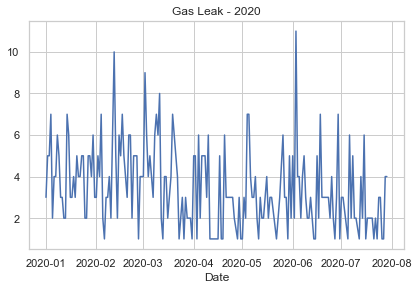

In [101]:
gas2020 = gas[gas['year'] == 2020]
gas2020.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Gas Leak - 2020')

Thank you have a nice day